# 北京上海那个城市更加宜居？

数据来源：[环保部数据中心](http://datacenter.mep.gov.cn/index)

获取方式：爬虫下载

### 爬虫程序

In [44]:
import requests
from bs4 import BeautifulSoup
import collections

def get_aqi_data(city, start_date, end_date):
    URL = "http://datacenter.mep.gov.cn:8099/ths-report/report!list.action"

    aqi_result = dict()

    page_no = 0

    session = requests.Session()
    
    while page_no < 1000:
        page_no = page_no + 1
        data = {
            'page.pageNo'    : page_no,
            'CITY'           : city,
            'V_DATE'         : start_date,
            'E_DATE'         : end_date,
            'xmlname'        : 1462259560614
        }

        res = session.get(URL, params=data)
        if res.status_code != 200:
            print("query_error, status_code = ", res.status_code)
            return None

        rsp = res.text

        soup = BeautifulSoup(rsp)
        divs = soup.find_all('div')

        data = dict()

        for div in divs:
            if div.has_key('class') and 'report_main' in div['class']:
                rows = div.table.tbody.findAll('tr')
                for row in rows:
                    cols = row.findAll('td')
                    if len(cols) == 9:
                        data[cols[6].text] = cols[3].text

        if len(data) == 0 :
            break;
        
        aqi_result.update(data)
    
    session.close()
    return aqi_result


## 数据下载

In [45]:
import csv

import datetime

start_date = '2017-01-01'
end_date   = '2018-02-05'

dict_aqi_sh = get_aqi_data('上海', start_date, end_date);
dict_aqi_bj = get_aqi_data('北京', start_date, end_date);


D:\QuantosTerminal\python\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file D:\QuantosTerminal\python\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))
D:\QuantosTerminal\python\lib\site-packages\bs4\element.py:1577: UserWarning: has_key is deprecated. Use has_attr("class") instead.
  key))


In [58]:
date   = []
aqi_sh = []
aqi_bj = []

for k in sorted(dict_aqi_sh.keys()):
    date.append(datetime.datetime.strptime(k,'%Y-%m-%d'))
    aqi_sh.append(int(dict_aqi_sh[k]))
    
for k in sorted(dict_aqi_bj.keys()):
    aqi_bj.append(int(dict_aqi_bj[k]))


In [59]:
print(aqi_sh)
print(aqi_bj)

[82, 92, 127, 90, 55, 63, 63, 94, 87, 107, 52, 93, 130, 39, 35, 53, 90, 65, 105, 90, 73, 65, 44, 52, 75, 73, 65, 62, 78, 42, 42, 45, 44, 57, 79, 152, 89, 45, 38, 97, 57, 74, 99, 93, 103, 89, 75, 64, 52, 65, 65, 46, 75, 102, 60, 108, 158, 77, 65, 73, 63, 68, 99, 102, 50, 64, 67, 104, 85, 89, 53, 55, 55, 67, 53, 64, 52, 58, 73, 85, 47, 50, 59, 105, 102, 87, 76, 79, 58, 63, 99, 110, 102, 93, 80, 95, 82, 64, 54, 78, 80, 74, 110, 120, 82, 85, 87, 82, 82, 69, 85, 109, 120, 70, 67, 75, 118, 123, 135, 72, 55, 53, 43, 67, 142, 147, 71, 67, 141, 154, 70, 120, 106, 64, 60, 78, 97, 98, 71, 68, 55, 44, 53, 96, 81, 111, 131, 90, 95, 116, 131, 89, 85, 77, 65, 52, 149, 157, 142, 48, 76, 64, 52, 60, 82, 87, 106, 67, 45, 47, 49, 55, 75, 60, 68, 123, 124, 86, 52, 94, 100, 60, 97, 70, 101, 122, 107, 95, 67, 49, 115, 152, 172, 150, 137, 135, 75, 144, 147, 160, 195, 164, 200, 204, 162, 118, 96, 46, 35, 33, 40, 46, 52, 137, 139, 87, 166, 191, 59, 48, 172, 179, 92, 73, 67, 134, 92, 116, 138, 140, 48, 72, 25, 

## 画图展示

In [52]:
import matplotlib.pyplot as plt  

AQI_LEVELS = {
    'aqi_green'   : [50   ,u'优'     ,  'green' ],
    'aqi_yellow'  : [100  ,u'良'     ,  'yellow'], 
    'aqi_orange'  : [150  ,u'轻度污染',  'orange'],
    'aqi_red'     : [200  ,u'中度污染',  'red'],
    'aqi_purple'  : [250  ,u'重度污染',  'purple'],
    'aqi_maroon'  : [500  ,u'严重污染',  'maroon']
}

# 解决中文字体问题
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


## 画一个柱状图

In [60]:
def plot_aqi_series(date, aqi, address):
    plt.figure(figsize=(14, 8))
    plt.plot(date, aqi, color='royalblue', marker='o', markersize=2)

    for k, v in AQI_LEVELS.items():
        plt.axhline(v[0], color=v[2], label=v[1], linestyle='--', linewidth=1.2)
    
    plt.legend()
    plt.ylabel(u'空气质量指数 (AQI)')
    plt.xlabel(u'日期')
    plt.title(address + u"空气质量指数变化情况")

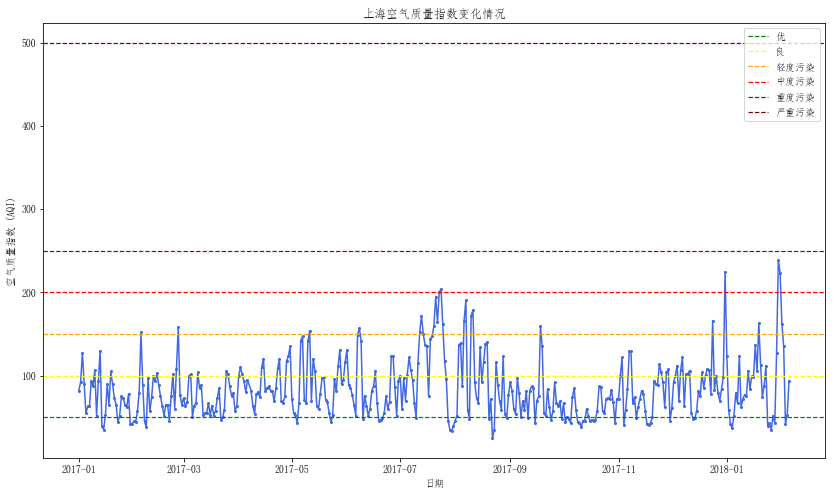

In [61]:
plot_aqi_series(date, aqi_sh, '上海')

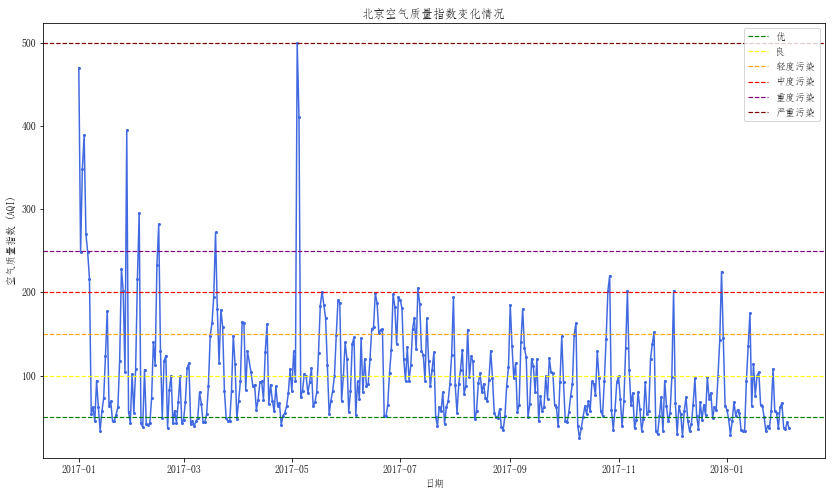

In [62]:
plot_aqi_series(date, aqi_bj, '北京')

## 分布情况

In [63]:
import numpy as np

D:\QuantosTerminal\python\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


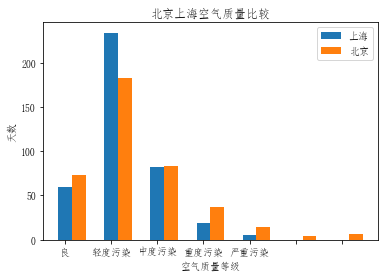

In [64]:
# 详细分布情况
hist_sh, aqi_range = np.histogram(aqi_sh, bins=[0,50,100,150,200,250,300,500])
hist_bj, aqi_range = np.histogram(aqi_bj, bins=[0,50,100,150,200,250,300,500])

axis_x = list(range(0, len(hist_sh)))
axis_x2 = [x + 0.3 for x in axis_x]

xlabels = []
for k, v in AQI_LEVELS.items():
    xlabels.append(v[1])

ax1 = plt.subplot()
ax1.bar(axis_x, hist_sh.tolist(), width=0.3, label=u'上海')
ax1.xaxis.set_ticklabels(xlabels)
ax1.legend()

ax2 = plt.subplot()
ax2.bar(axis_x2, hist_bj.tolist(), width=0.3, label=u'北京')
ax2.legend()

plt.ylabel(u'天数')
plt.xlabel(u'空气质量等级')
plt.title(u'北京上海空气质量比较')
plt.show()

## recent 2m

D:\QuantosTerminal\python\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


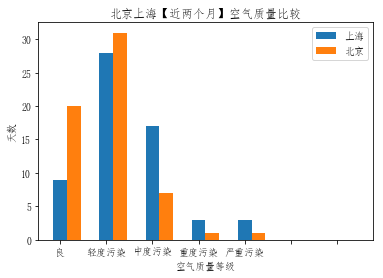

In [66]:
# 详细分布情况
hist_sh, aqi_range = np.histogram(aqi_sh[-60: ], bins=[0,50,100,150,200,250,300,500])
hist_bj, aqi_range = np.histogram(aqi_bj[-60: ], bins=[0,50,100,150,200,250,300,500])

axis_x = list(range(0, len(hist_sh)))
axis_x2 = [x + 0.3 for x in axis_x]

xlabels = []
for k, v in AQI_LEVELS.items():
    xlabels.append(v[1])

ax1 = plt.subplot()
ax1.bar(axis_x, hist_sh.tolist(), width=0.3, label=u'上海')
ax1.xaxis.set_ticklabels(xlabels)
ax1.legend()

ax2 = plt.subplot()
ax2.bar(axis_x2, hist_bj.tolist(), width=0.3, label=u'北京')
ax2.legend()

plt.ylabel(u'天数')
plt.xlabel(u'空气质量等级')
plt.title(u'北京上海【近两个月】空气质量比较')
plt.show()

### 函数

In [67]:
import numpy as np

def plot_aqi_hist_compare(aqi_list, label_list, title=""):
    n = len(aqi_list)
    i = 0
    for aqi_array in aqi_list:
        # 详细分布情况
        hist, aqi_range = np.histogram(aqi_array, bins=[0,50,100,150,200,250,300,500])

        TOTAL_WIDTH = 0.7
        width = TOTAL_WIDTH / n
        axis_x = list(range(1, len(aqi_range)))
        axis_x = [x + width * i for x in axis_x]

        xlabels = []
        # global aqi_level
        for k, v in AQI_LEVELS.items():
            xlabels.append(v[1])

        ax1 = plt.subplot()
        ax1.bar(axis_x, hist, width=width,
                label=label_list[i]
               )
        ax1.xaxis.set_ticklabels(xlabels)
        ax1.legend()

        #ax2 = plt.subplot()
        #ax2.bar(axis_x2, hist_bj.tolist(), width=0.3, label=u'北京')
        #ax2.legend()
        
        i += 1
    plt.ylabel(u'天数')
    plt.xlabel(u'空气质量等级')
    plt.title(title)
    plt.show()

D:\QuantosTerminal\python\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


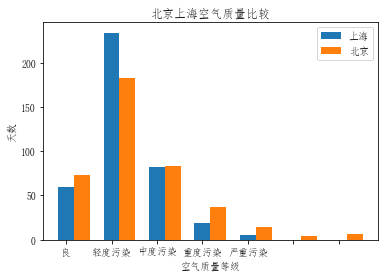

In [68]:
plot_aqi_hist_compare([aqi_sh, aqi_bj], [u'上海', u'北京'], '北京上海空气质量比较')

D:\QuantosTerminal\python\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


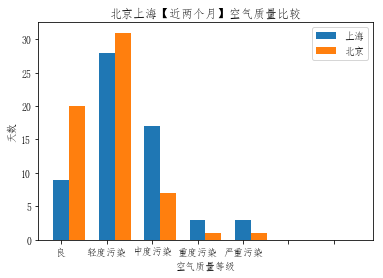

In [69]:
plot_aqi_hist_compare([aqi_sh[-60: ], aqi_bj[-60: ]], [u'上海', u'北京'], '北京上海【近两个月】空气质量比较')